In [1]:
# Importar bibliotecas essenciais
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder # Para variáveis categóricas
from sklearn.compose import ColumnTransformer # Para aplicar transformações em diferentes colunas
from sklearn.pipeline import Pipeline # Para encadear as etapas de pré-processamento e modelagem
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Importar numpy para pd.np (que se tornou np na nova versão do pandas)

print("Bibliotecas importadas com sucesso!")


Bibliotecas importadas com sucesso!


In [18]:
# Adicione esta célula antes da célula que deu erro
# --- Carregamento do Dataset ---

# **Ajuste o nome do arquivo CSV conforme o seu caso**
caminho_do_arquivo_csv = 'dados_limpos.csv' # <---- Nome do seu arquivo

try:
    # Tenta carregar com UTF-8 e delimitador ';'
    df = pd.read_csv(caminho_do_arquivo_csv, encoding='utf-8', sep=';') # <--- Adicionado sep=';'
    print(f"Dataset '{caminho_do_arquivo_csv}' carregado com sucesso usando UTF-8 e ';'.")
except UnicodeDecodeError:
    # Se falhar, tenta com Latin-1 e delimitador ';'
    try:
        df = pd.read_csv(caminho_do_arquivo_csv, encoding='latin-1', sep=';') # <--- Adicionado sep=';'
        print(f"Dataset '{caminho_do_arquivo_csv}' carregado com sucesso usando Latin-1 e ';'.")
    except Exception as e:
        print(f"Erro ao carregar o dataset: {e}")
        df = None # Define df como None para evitar erros posteriores se o carregamento falhar

# Opcional: Verifique as primeiras linhas e colunas para confirmar o carregamento
if df is not None:
    print("\nPrimeiras 5 linhas do dataset:")
    display(df.head()) # Usar display do IPython.display para melhor formatação no Colab
    print("\nNomes das colunas:")
    print(df.columns.tolist()) # <--- Verifique a saída aqui AGORA!
    print("\nInformações do dataset:")
    df.info()

Dataset 'dados_limpos.csv' carregado com sucesso usando Latin-1 e ';'.

Primeiras 5 linhas do dataset:


,ID,Idade,Gênero,Nível de Ensino,Área de Formação,Região onde mora,Estado onde mora,Código da Região
0,1,28,Feminino,Graduação,Engenharias,Nordeste,PE,2
1,2,35,Feminino,Pós-graduação,Exatas,Sudeste,RS,4
2,3,31,Feminino,Pós-graduação,Ciências Sociais,Centro-Oeste,RJ,3
3,4,37,Feminino,Ensino Médio,Engenharias,Sul,MG,5
4,5,57,Masculino,Fundamental Completo,Ciências Sociais,Sul,SP,5



Nomes das colunas:
['ID', 'Idade', 'Gênero', 'Nível de Ensino', 'Área de Formação', 'Região onde mora', 'Estado onde mora', 'Código da Região']

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                500 non-null    int64 
 1   Idade             500 non-null    int64 
 2   Gênero            500 non-null    object
 3   Nível de Ensino   500 non-null    object
 4   Área de Formação  500 non-null    object
 5   Região onde mora  500 non-null    object
 6   Estado onde mora  500 non-null    object
 7   Código da Região  500 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 31.4+ KB


In [22]:
# --- Pré-processamento e Definição da Variável Alvo ---

# **Nomes das colunas ajustados conforme o que esperamos que a codificação corrija**
# VERIFIQUE A SAÍDA DA CÉLULA 2 (df.columns.tolist()) E AJUSTE AQUI SE NECESSÁRIO
# Ajuste os nomes das colunas com base na saída de df.columns.tolist()
# >> CERTIFIQUE-SE QUE ESSES NOMES CORRESPONDEM EXATAMENTE À SAÍDA DE df.columns.tolist() <<
nome_da_coluna_genero = 'Gênero' # <-- Ajuste se necessário (ex: 'Genero')
nome_da_coluna_nivel_ensino = 'Nível de Ensino' # <-- Ajuste OBRIGATORIAMENTE para o nome exato (ex: 'Nivel_Ensino')
nome_da_coluna_area_formacao = 'Área de Formação' # <-- Ajuste se necessário (ex: 'Area_Formacao')
nome_da_coluna_regiao_mora = 'Região onde mora' # <-- Ajuste se necessário (ex: 'Regiao_Mora')
nome_da_coluna_idade = 'Idade' # Este estava correto no exemplo, mas confirme

# Definindo a variável alvo (Nível de Ensino)
# >> ESTE BLOCO IF/ELSE CONTROLA SE X E Y SERÃO DEFINIDOS <<
if nome_da_coluna_nivel_ensino not in df.columns:
    print(f"Erro: A coluna '{nome_da_coluna_nivel_ensino}' não foi encontrada no seu CSV após a decodificação.")
    print("Verifique a saída de `df.columns.tolist()` na Célula 2 para o nome exato.")
else:
    # --- Código que define X e y (ESTE BLOCO PRECISA RODAR!) ---
    # Mapeando os níveis de ensino para a variável alvo 'Concluiu_Ensino_Superior'
    # Ajuste os valores ('Graduação', 'Pós-Graduação') se no seu CSV eles estiverem escritos de forma diferente
    df['Concluiu_Ensino_Superior'] = df[nome_da_coluna_nivel_ensino].apply(lambda x: 1 if x in ['Graduação', 'Pós-Graduação'] else 0)

    # Definindo as features (atributos de entrada)
    # Use as variáveis ajustadas aqui
    features = [nome_da_coluna_genero, nome_da_coluna_area_formacao, nome_da_coluna_regiao_mora, nome_da_coluna_idade]
    target = 'Concluiu_Ensino_Superior'

    # Verifique se todas as features existem no seu DataFrame
    missing_features = [f for f in features if f not in df.columns]
    if missing_features:
        print(f"Erro: As seguintes features não foram encontradas no seu CSV: {missing_features}.")
        print("Por favor, verifique os nomes das colunas no seu arquivo CSV e ajuste a lista 'features' nesta célula.")
    else:
        # --- X e y são definidos AQUI ---
        X = df[features]
        y = df[target]

        print(f"\nVariável Alvo '{target}' criada.")
        print(y.value_counts())
        print("\nPrimeiras 5 linhas das features (X):")
        print(X.head())
        # --- Fim do código que define X e y ---


Variável Alvo 'Concluiu_Ensino_Superior' criada.
Concluiu_Ensino_Superior
0    414
1     86
Name: count, dtype: int64

Primeiras 5 linhas das features (X):
      Gênero  Área de Formação Região onde mora  Idade
0   Feminino       Engenharias         Nordeste     28
1   Feminino            Exatas          Sudeste     35
2   Feminino  Ciências Sociais     Centro-Oeste     31
3   Feminino       Engenharias              Sul     37
4  Masculino  Ciências Sociais              Sul     57


In [12]:
# Esta célula deve vir logo APÓS a célula que contém pd.read_csv()

print("Verificando se 'df' foi criado...") # <--- O ERRO ESTÁ AQUI OU NAS LINHAS ABAIXO
# ^  # Este é o indent inesperado - Removido o indent
if 'df' in locals() or 'df' in globals():
    print("'df' existe no escopo.")
    if df is not None:
        print("'df' não é None.")
        # ... o resto do código verificação ...

Verificando se 'df' foi criado...
'df' existe no escopo.
'df' não é None.


In [20]:
# --- Codificação de Variáveis Categóricas e Numéricas ---

# Identificando colunas categóricas e numéricas que serão usadas no modelo
categorical_features = ['Gênero', 'Área de Formação', 'Região onde mora']
numerical_features = ['Idade']

# Criando o pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ])

print("Pré-processador de colunas configurado.")

Pré-processador de colunas configurado.


In [23]:
# --- Divisão dos Dados em Treino e Teste ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTamanho do conjunto de treino: {len(X_train)} amostras")
print(f"Tamanho do conjunto de teste: {len(X_test)} amostras")
print(f"Proporção de 'Concluiu_Ensino_Superior' (1) no treino: {y_train.sum() / len(y_train):.2f}")
print(f"Proporção de 'Concluiu_Ensino_Superior' (1) no teste: {y_test.sum() / len(y_test):.2f}")


Tamanho do conjunto de treino: 400 amostras
Tamanho do conjunto de teste: 100 amostras
Proporção de 'Concluiu_Ensino_Superior' (1) no treino: 0.17
Proporção de 'Concluiu_Ensino_Superior' (1) no teste: 0.17



--- Criando e Treinando o Modelo Random Forest ---
Iniciando o treinamento do Random Forest...
Treinamento do Random Forest concluído.

--- Avaliação do Modelo Random Forest ---
Acurácia: 0.7600

Relatório de Classificação:
              precision    recall  f1-score   support

Não Concluiu       0.84      0.88      0.86        83
    Concluiu       0.23      0.18      0.20        17

    accuracy                           0.76       100
   macro avg       0.53      0.53      0.53       100
weighted avg       0.74      0.76      0.75       100


Matriz de Confusão:


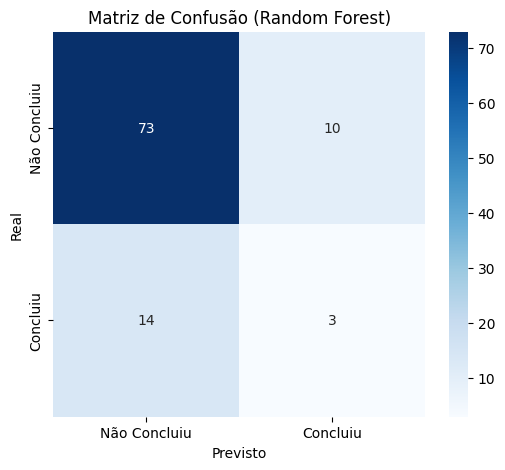

In [34]:
# --- Novo Modelo: Random Forest ---

# Importar o classificador Random Forest
from sklearn.ensemble import RandomForestClassifier

print("\n--- Criando e Treinando o Modelo Random Forest ---")

# Define o classificador Random Forest
# - n_estimators: Número de árvores (pode ser aumentado para melhor performance, mas aumenta o tempo de treino)
# - max_depth: Profundidade máxima de cada árvore (ajuda a controlar overfitting)
# - random_state: Para reprodutibilidade
# - class_weight='balanced': Importante se a variável alvo for desbalanceada
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')

# Cria o pipeline com o pré-processador e o classificador Random Forest
# Usamos o mesmo 'preprocessor' que você definiu anteriormente
model_pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', rf_classifier)
                                  ])

# Treina o modelo Random Forest no conjunto de treino
print("Iniciando o treinamento do Random Forest...")
model_pipeline_rf.fit(X_train, y_train)
print("Treinamento do Random Forest concluído.")

# --- Avaliação do Modelo Random Forest ---

print("\n--- Avaliação do Modelo Random Forest ---")

# Faz previsões no conjunto de teste
y_pred_rf = model_pipeline_rf.predict(X_test)

# Calcula e imprime as métricas de avaliação
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.4f}")

print("\nRelatório de Classificação:")
# Use zero_division=0 para evitar avisos se uma classe não tiver previsões
print(classification_report(y_test, y_pred_rf, target_names=['Não Concluiu', 'Concluiu'], zero_division=0))

print("\nMatriz de Confusão:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Concluiu', 'Concluiu'],
            yticklabels=['Não Concluiu', 'Concluiu'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão (Random Forest)')
plt.show()